In [38]:
#comment this out if not running on Colab, It is used for importing files in colab
from google.colab import files
uploaded = files.upload()

Saving g9-proc-reg.csv to g9-proc-reg (1).csv


In [0]:
import pandas as pd
data = pd.read_csv('g9-proc-reg.csv', header=None)
data.columns = ['y', 'x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12']
data = data.iloc[1:]
#data

In [0]:
data=data.astype(float)
data = data.reset_index(drop=True)


In [0]:
from sklearn.decomposition import PCA
from sklearn import metrics
import math
test = math.inf

In [0]:
pca = PCA(0.99) #to produce transformed components that captures 99% of variance
principalComponents = pca.fit_transform(data.iloc[:,1:13])

In [43]:
(pca.explained_variance_ratio_)

array([0.09690484, 0.09252587, 0.09074433, 0.08944478, 0.08566017,
       0.08459996, 0.08331123, 0.08117544, 0.07950223, 0.07495334,
       0.07150339, 0.06967443])

In [0]:
principalDf = pd.DataFrame(data = principalComponents,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
finalDf = pd.concat([data['y'],principalDf], axis = 1)
#finalDf

In [0]:

X = finalDf[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']]  
Y = finalDf[['y']]


#LINEAR REGRESSION USING PCA(0.99)
#Notice: The transformed space has all the 12 components  since the variance is almost equally divided among them

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10)

rmse=0

for train_index, test_index in kf.split(data):
      
     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
     Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

     clf = LinearRegression()

     clf.fit(X_train,Y_train)
     Y_pred=clf.predict(X_test)

     rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  
rmse = rmse/10
print(rmse)

47.96262713366275


#Average RMSE MLR with PCA - 47.9626

In [0]:
X = data[['x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12']]  
Y = data[['y']]


In [0]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

#LASSO 
alpha = 0.32
RMSE  = 47.9456

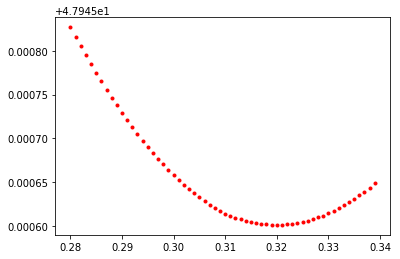

0.32000000000000006
47.945601321411196


In [49]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10)

arr=np.arange(0.28, 0.34, 0.001)
min_a = 0
min_rmse = test

for a in arr:
  rmse = 0
  
  

  for train_index, test_index in kf.split(data):
      #print("Train:", train_index, "Validation:",test_index)
     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
     Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

     clf = linear_model.Lasso(alpha=a)

     clf.fit(X_train,Y_train)
     Y_pred=clf.predict(X_test)

     rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  
  rmse = rmse/10    
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  plt.plot(a,rmse,'r.')
  
  #print('a value : %.3f rmse : %.3f' %(a,rmse))    
  
plt.show()
print(min_a)
print(min_rmse)


#RIDGE REGRESSION
lambda = 4.598
rmse = 47.96069

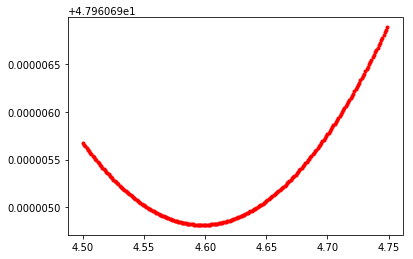

4.598000000000033
47.96069481479234


In [50]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10)

arr=np.arange(4.5, 4.75, 0.001)
min_a = 0
min_rmse = test

for a in arr:
  rmse = 0
  
  

  for train_index, test_index in kf.split(data):
      #print("Train:", train_index, "Validation:",test_index)
     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
     Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

     clf = linear_model.Ridge(alpha=a)

     clf.fit(X_train,Y_train)
     Y_pred=clf.predict(X_test)

     rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  
  rmse = rmse/10    
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  plt.plot(a,rmse,'r.')
  
  #print('a value : %.3f rmse : %.3f' %(a,rmse))    
  
plt.show()
print(min_a)
print(min_rmse)

#MLP Regressor

In [0]:
  from sklearn.neural_network import MLPRegressor
  

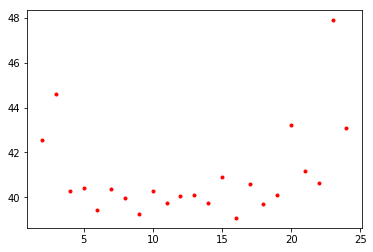

39.07379764946499
16


In [61]:
min_a = 0
min_rmse = test
for a in range(2,25,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       clf= MLPRegressor(hidden_layer_sizes=(a),solver='lbfgs',max_iter=500)

       Y_train_arr=np.array(Y_train)
       Y_train_arr= Y_train_arr.ravel() 
       clf.fit(X_train, Y_train_arr)

       Y_pred=clf.predict(X_test)

       Y_test_arr=np.array(Y_test)
       Y_test_arr= Y_test_arr.ravel() 

       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test_arr, Y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

#Decision Tree Regressor

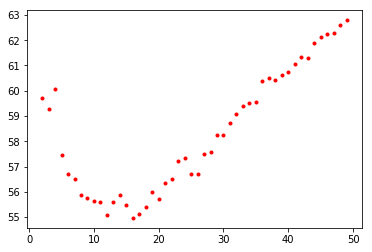

54.965602407467614
16


In [56]:
min_a = 0
min_rmse = test

for a in range(2,50,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       clf= DecisionTreeRegressor(min_samples_leaf=a)

        
       clf.fit(X_train, Y_train)

       Y_pred=clf.predict(X_test)

       
       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)

#Random Forest Regressor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/loc

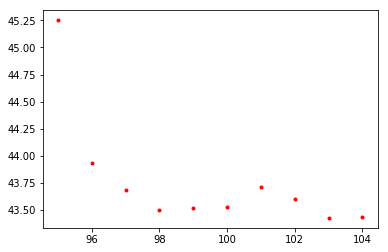

43.42490749315582
103


In [57]:
min_a = 0
min_rmse = test

for a in range(95,105,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       #clf= DecisionTreeRegressor(min_samples_leaf=a)
       #regr_3= DecisionTreeRegressor(min_samples_leaf=16)
       clf = RandomForestRegressor(
                          n_estimators=a)
        
       clf.fit(X_train, Y_train)

       Y_pred=clf.predict(X_test)

       
       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)

#Bagging Regressor

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

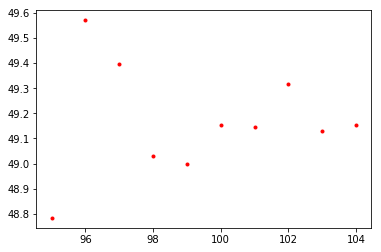

48.78321875651331
95


In [58]:
min_a = 0
min_rmse = test

for a in range(95,105,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       #clf= DecisionTreeRegressor(min_samples_leaf=a)
       regr_3= DecisionTreeRegressor(min_samples_leaf=16)
       clf = BaggingRegressor(base_estimator=regr_3,
                          n_estimators=a)
        
       clf.fit(X_train, Y_train)

       Y_pred=clf.predict(X_test)

       
       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)

#AdaBoost Regressor

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

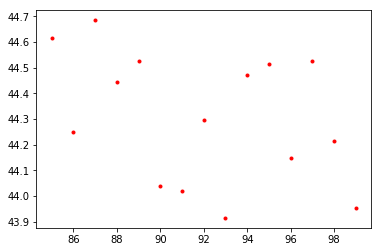

43.915049911165774
93


In [59]:
min_a = 0
min_rmse = test

for a in range(85,100,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       #clf= DecisionTreeRegressor(min_samples_leaf=a)
       regr_3= DecisionTreeRegressor(min_samples_leaf=16)
       clf = AdaBoostRegressor(base_estimator=regr_3,
                          n_estimators=a)
        
       clf.fit(X_train, Y_train)

       Y_pred=clf.predict(X_test)

       
       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)

#ElasticNet

In [60]:
from sklearn.linear_model import ElasticNet
min_a = 0
min_b = 0
min_rmse = test
list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
list1 = [0.00001, 1.2, 1.3]

for b in list1:
  for a in list:

    for train_index, test_index in kf.split(data):
          #print("Train:", train_index, "Validation:",test_index)
         X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
         Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

         #clf= DecisionTreeRegressor(min_samples_leaf=a)

         #clf = AdaBoostRegressor(regr_3,
         #                   n_estimators=a)
         clf = ElasticNet(alpha = a, l1_ratio = b)

         clf.fit(X_train, Y_train)

         Y_pred=clf.predict(X_test)


         rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
      #
    rmse = rmse/10
    if(rmse<min_rmse):
      min_rmse = rmse
      min_a = a
      min_b = b

    print(b,a,rmse)
    #plt.subplot(211)
    #plt.plot(a,rmse,'r.')
    #plt.subplot(212)
    #plt.plot(b,rmse,'b.')
#plt.show()
print('MIN_RMSE OBTAINED %.3f' % min_rmse)
print('CORRESPONDING a VALUE OBTAINED %.3f'%min_a)
print('CORRESPONDING b VALUE OBTAINED %.6f'%min_b)

1e-05 0.01 52.35791349833629
1e-05 0.02 53.21224052101657
1e-05 0.03 53.32503862824602
1e-05 0.04 53.37620255296142
1e-05 0.05 53.432934488044815
1e-05 0.06 53.501206478077464
1e-05 0.07 53.58090530509902
1e-05 0.08 53.67134560622759
1e-05 0.09 53.77181981026838
1.2 0.01 53.340265802292876
1.2 0.02 53.29812490733583
1.2 0.03 53.295362760679986
1.2 0.04 53.29703791641587
1.2 0.05 53.29977038295287
1.2 0.06 53.3030852445965
1.2 0.07 53.30692949883613
1.2 0.08 53.31129000551216
1.2 0.09 53.31629187968677
1.3 0.01 53.29571809152109
1.3 0.02 53.296336869963284
1.3 0.03 53.30020610210006
1.3 0.04 53.30572992518411
1.3 0.05 53.31262384779601
1.3 0.06 53.3208475558446
1.3 0.07 53.330418818967665
1.3 0.08 53.34146828429626
1.3 0.09 53.35404845730388
MIN_RMSE OBTAINED 52.358
CORRESPONDING a VALUE OBTAINED 0.010
CORRESPONDING b VALUE OBTAINED 0.000010


#KNN Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor

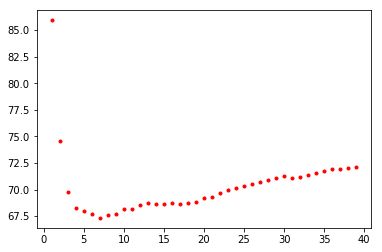

67.33428984028288
7


In [67]:
min_a = 0
min_rmse = test

for a in range(1,40,1):
  
  for train_index, test_index in kf.split(data):
        #print("Train:", train_index, "Validation:",test_index)
       X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
       Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

       neigh = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
       metric_params=None, n_jobs=1, n_neighbors=a, p=2,
       weights='uniform')
       neigh.fit(X_train, Y_train)
       y_pred = neigh.predict(X_test)
    
       
       rmse = rmse + math.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    #
  rmse = rmse/10
  if(rmse<min_rmse):
    min_rmse = rmse
    min_a = a
  
  #print(rmse)
  plt.plot(a,rmse,'r.')
plt.show()
print(min_rmse)
print(min_a)